# Bilan énergie d'un système en mouvement

## 1re Spécialité physique-chimie

Capacité numérique : Utiliser un langage de programmation pour effectuer le bilan énergétique d’un système en mouvement.

Pour traiter ce point, le code suivant simule la trajectoire d'une balle de tennis lancée en l'air. Il utilise les équations donnant les coordonnées en fonction du temps des points de la trajectoire et la vitesse à chaque point (on néglige les frottements, ces équations seront vues en terminale spé).

Le code calcule ensuite l'énergie cinétique, l'énergie potentielle et l'énergie mécanique de la balle, puis les trace ensemble. On vérifie le fait que l'énergie mécanique est constante et que l'énergie cinétique et l'énergie potentielle se convertissent l'une en l'autre.

Les calculs sont fait avec trois méthodes différentes, pour vous laisser entrevoir ce qu'on peut trouver dans des extraits de code.

Ludovic Gaudichet 2020, licence CC BY-NC-SA, lycée de Noisiel

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *


g = 9.81             # accélération pesanteur sur Terre m.s-2
m = 0.057            # masse du projectile kg

x0,z0   = 0, 0       # position initiale en m
Vx0,Vz0 = 2.5, 8.83  # vitesse initiale en m/s
Dt = 0.05            # DELTA t : durée entre chaque point (s)
nPts = 37            # nombre de points


### méthode A :
Une méthode classique que l'on utiliserait avec n'importe quel language de programmation. Déclarer des listes et les remplir au fur et à mesure dans une boucle, avec des calculs sur des scalaires (simplement des nombres)

In [2]:
# création des listes :
tA = []
xA,zA = [],[]
VxA, VzA, VA = [],[],[]
EmA, EcA, EppA = [],[],[]

temps = 0
# calcul des grandeurs pour chaque point
for i in range (0,nPts):
    tA.append(temps)

    # équations de la vitesse et de la trajectoire
    # (à voir en terminale spé. physique)
    xA.append( x0 + Vx0*temps )
    zA.append( z0 + Vz0*temps - g*temps**2/2 )
    
    # VxA = Vx0 = une constante
    VzA.append( Vz0 - g*temps )
    VA.append( sqrt( Vx0**2 + VzA[-1]**2) )
    
    EppA.append( m*g*zA[-1] )
    EcA.append( 0.5*m*VA[-1]**2)
    EmA.append( EppA[-1]+EcA[-1] )
    temps += Dt # temps = temps + Dt



### méthode B :
Avec numpy, qui est une librairie permettant de faire des calculs en une fois sur toutes les valeurs d'un tableau (numpy array).
Cela permet de garder en gros la même synthaxe qu'un calcul sur un scalaire et autorise un certain parallelisme, permettant dans certaines conditions des traitements plus rapides.

In [3]:
tB = np.linspace(0,1.8,nPts)
xB = x0 + Vx0*tB
zB = z0 + Vz0*tB - (tB**2)*g/2
# possible aussi : zB = z0 + Vz0*tB - np.square(tB)*g/2

# VxB serait une constante = Vx0, pas besoin de la créer en array
VzB = Vz0 - g*tB
VB = np.sqrt( Vx0**2 + VzB**2 )

EppB = m*g*zB
EcB = 0.5*m*VB**2
EmB = EppB + EcB

### méthode C :
Ell utilise une syntaxe particulière de python pour créer des
listes. A n'utiliser que ponctuellement ?

In [4]:
tC = [Dt*i for i in range(0,nPts)]
xC = [x0 + Vx0*temps for temps in tC]
zC = [z0 + Vz0*temps - g*temps**2/2 for temps in tC]

VC = [ sqrt( Vx0**2 + (Vz0-g*temps)**2 ) for temps in tC]

EppC = [m*g*z for z in zC ]
EcC = [0.5*m*vit**2 for vit in VC]
EmC = [ EppC[i] + EcC[i] for i in range(0,nPts) ]

# Attention : à ne pas faire :
# EmC = EppC + EcC # car cela ajoute la liste EcC après la liste EppC !

### graphe :
Les trois méthodes font la même simulation. On trace le résultat d'une
simulation :

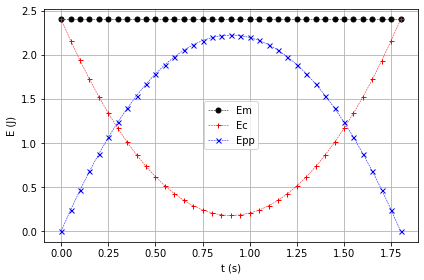

In [5]:
plt.close()
plt.xlabel('t (s)')
plt.ylabel('E (J)')

plt.plot(tC,EmC,'o--',color='black',ms=5,lw=0.5,label='Em')
plt.plot(tC,EcC,'+--',color='red',ms=5,lw=0.5,label='Ec')
plt.plot(tC,EppC,'x--',color='blue',ms=5,lw=0.5,label='Epp')

plt.grid()
plt.tight_layout()
plt.legend()
plt.show()